<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/Data_Varification/0813_%EB%AA%A8%EB%8D%B8%EC%82%AC%EC%9A%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##모델 사용법

###예측할 데이터 읽어서 numpy로 만들기

In [ ]:
#real_file = pd.read_csv('/content/real_data_with_rotate_2.csv',encoding='utf-8')
#real_file_label = real_file.pop('Label')
#real_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)
#=> drop은 테스트할 csv파일에 있는 것중 사용 안하는 column을 없애는 것!
#real_array = np.delete(real_file.values,-1,0).astype(np.float)
#real_label = np.delete(real_file_label.values,-1,0).astype(np.int)

###정규화가 안된 경우

정규화를 진행하고 다음 단계로 넘어가야한다.

In [ ]:
'''
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX = 2
ACCEL_X_MIN = -2
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 270
STEERING_MIN = -270
ACCEL_MAX = 80
ACCEL_MIN = 0
BRAKE_MAX = 60
BRAKE_MIN = 0
'''

In [ ]:
#length_real = int(len(real_array)/25)
'''
print("Process 3-1 Velocity[",end="")
for i in range(len(real_array)):
  real_array[i][VELOCITY] = round(real_array[i][VELOCITY],0)
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    real_array[i][VELOCITY] = NOR_MAX
  elif(real_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(real_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 3-2 Accel_X [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    real_array[i][ACCEL_X] = NOR_MAX
  elif(real_array[i][ACCEL_X]>= 0):    #MID
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(real_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL_X] = NOR_MIN
print("]\nProcess 3-3 ROTATE_Z [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    real_array[i][ROT_Z] = NOR_MAX
  elif(real_array[i][ROT_Z]>= 0):    #MID
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*NOR_MAX),2)
  elif(real_array[i][ROT_Z]>ROT_Z_MIN):     #MIN
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ROT_Z] = NOR_MIN
print("]\nProcess 3-4 Steering[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][STEERING]>=STEERING_MAX):    #MAX
    real_array[i][STEERING] = NOR_MAX
  elif(real_array[i][STEERING]>= 0):   #MID
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(real_array[i][STEERING]> STEERING_MIN): #MIN
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][STEERING] = NOR_MIN
print("]\nProcess 3-5 Accelpad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    real_array[i][ACCEL] = NOR_MAX
  elif(real_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(real_array[i][ACCEL]> ACCEL_MIN):       #MIN
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL] = NOR_MIN
print("]\nProcess 3-6 Brakepad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    real_array[i][BRAKE] = NOR_MAX
  elif(real_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(real_array[i][BRAKE]> BRAKE_MIN):       #MIN
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][BRAKE] = NOR_MIN
print("]\nProcess 3 Clear")
'''

###정규화가 되어있는 경우이면

데이터셋으로 만들어야 한다.<br>
shape는 (데이터 총 개수, window_size, column수)

In [ ]:
#real_dataset_data = []
#real_dataset_label = []
#for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
#  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
#  real_dataset_label.append(real_label[i-1])
#re_data = np.array(real_dataset_data)
#re_label = np.array(real_dataset_label) 
#print(re_data.shape)

Convolution Neural Network이면 차원을 1차원 더 늘려줘야한다.
<br>
이번 연습용으로 주는 model은 cnn모델로 아래의 과정을 거처야한다.

In [ ]:
#re_c_data = re_data.reshape(-1,6,WINDOW_SIZE,1)

###모델

여기에 아까 위의 모델 불러오기를 적용한다.<br>
모델의 모양은 model.png를 참고

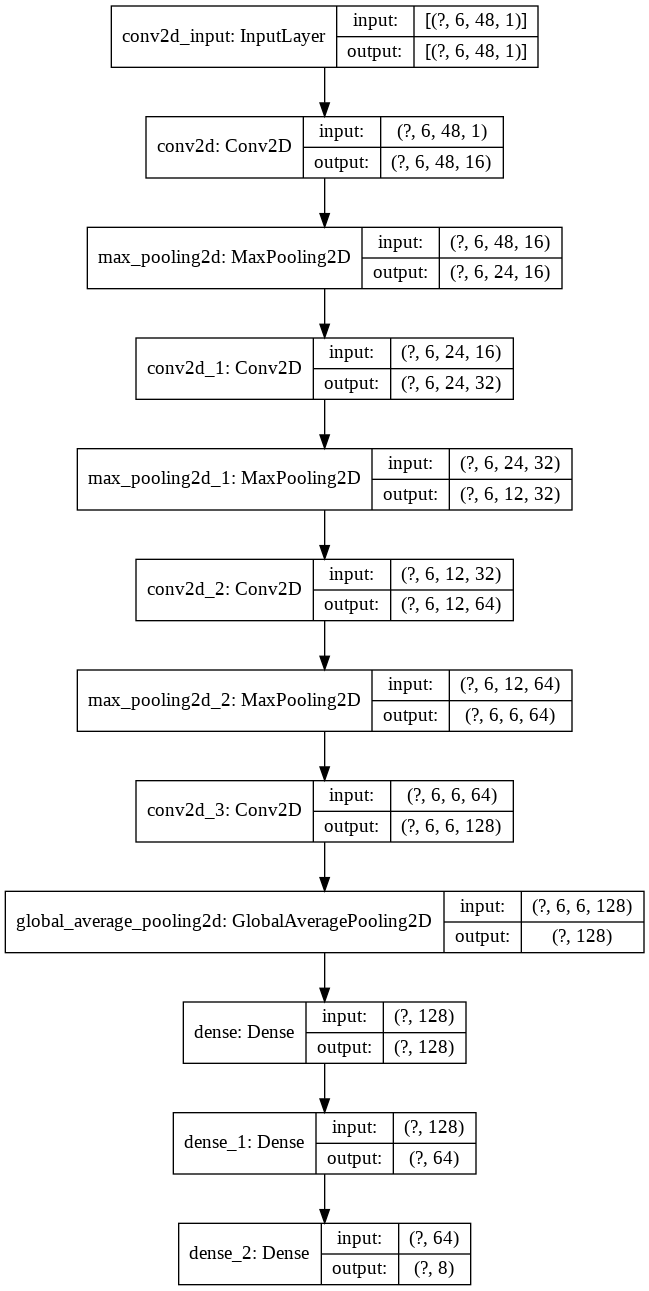

In [ ]:
from IPython.display import Image
Image('model.png')

###모델 불러오기

In [ ]:
from keras.models import load_model
loaded_model = load_model('Sim2Real_Model.h5')

In [ ]:
loaded_model_predictions = loaded_model.predict(re_c_data)
matrix = confusion_matrix(re_label, loaded_model_predictions.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[7967   45   65    6   18   20   18   59]
 [ 223 1511    0   19    0   72    4    0]
 [ 223    4  688    0   79   14  104    9]
 [  78   65    0  563    1    8    0    0]
 [  38    3   14    0  746    1   13   17]
 [  57   64    0    2    0  302    0    0]
 [  28    3   41    0    0    0  237    0]
 [  48    0    0    0    1    0    0 6737]]
[[8198]
 [1829]
 [1121]
 [ 715]
 [ 832]
 [ 425]
 [ 309]
 [6786]]
[[97  0  0  0  0  0  0  0]
 [12 82  0  1  0  3  0  0]
 [19  0 61  0  7  1  9  0]
 [10  9  0 78  0  1  0  0]
 [ 4  0  1  0 89  0  1  2]
 [13 15  0  0  0 71  0  0]
 [ 9  0 13  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 99]]


###모델 예측

각 요소는 아래의 cnn_real_predictions와 같은 predict로 부터 저런식으로 추출.
<br>
가장 마지막 layer가 softmax이므로 확률분포이다
<br>-> numpy.argmax를 통해 예측값을 뽑아낸다.

In [ ]:
'''
#cnn_real_predictions = cnn_model.predict(re_c_data)
txt = 'Pred_Direction,Real_Direction\n'
count = 0
for temp in re_c_data:
  if(np.argmax(cnn_real_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_real_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_real_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_real_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_real_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1
'''